In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [3]:
df=pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')
print(df.head())
print(df.info())
print(df.describe())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

<function matplotlib.pyplot.show(close=None, block=None)>

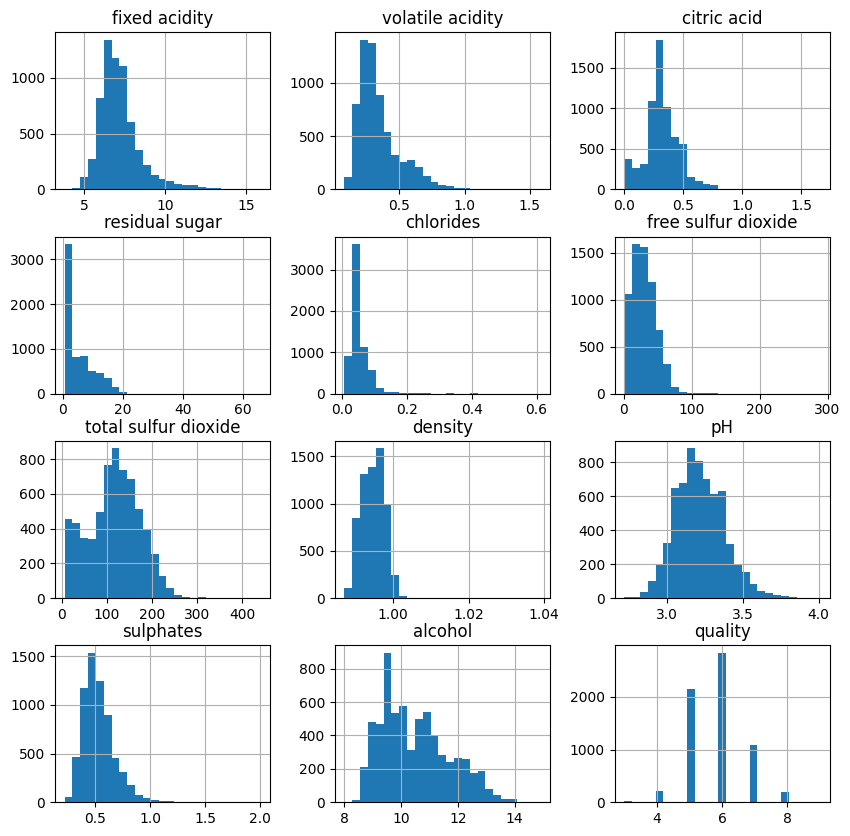

In [6]:
df.hist(bins=25,figsize=(10,10))
plt.show

**UNDERSTANDING THE INFERENCE OF THE DATA**

<Axes: xlabel='quality', ylabel='alcohol'>

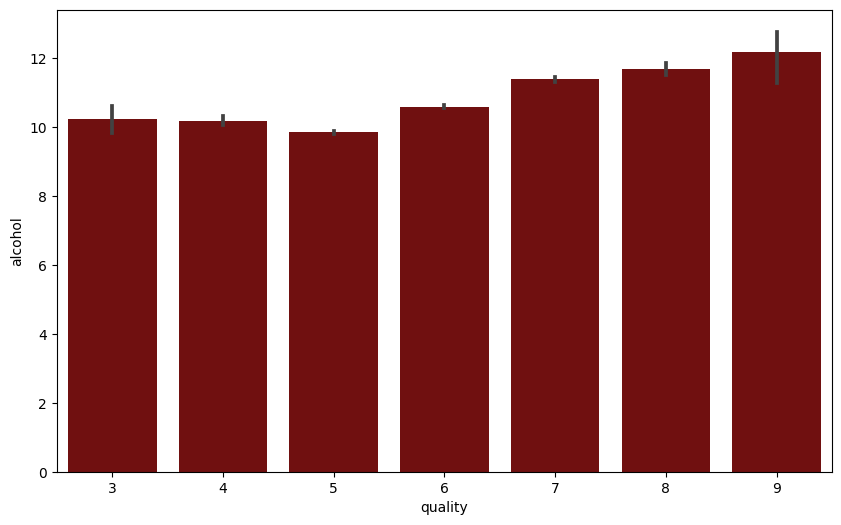

In [19]:
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'alcohol',data=df, color='maroon')

<Axes: xlabel='quality', ylabel='volatile acidity'>

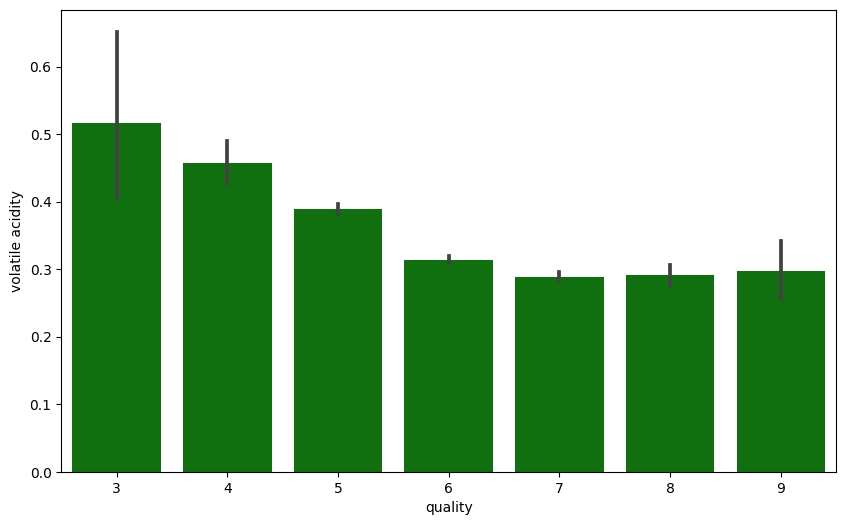

In [21]:
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'volatile acidity',data=df, color='green')

<Axes: xlabel='quality', ylabel='citric acid'>

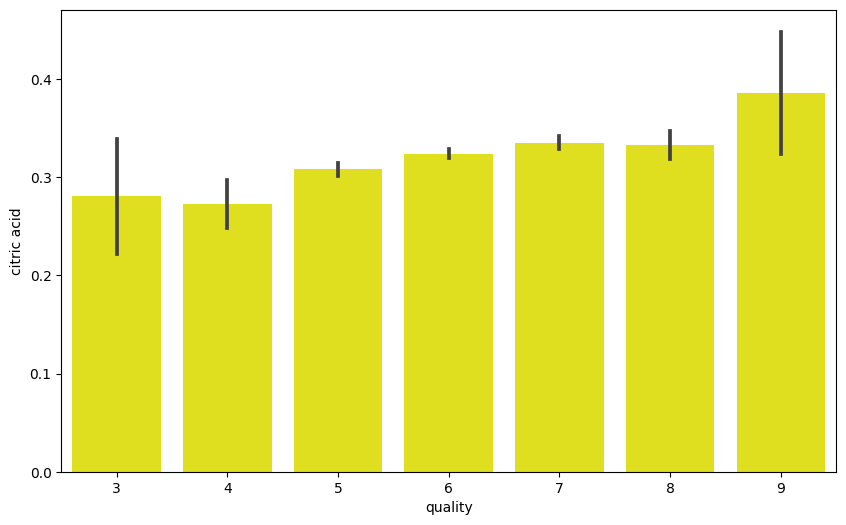

In [23]:
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'citric acid',data=df, color='yellow')

<Axes: xlabel='quality', ylabel='residual sugar'>

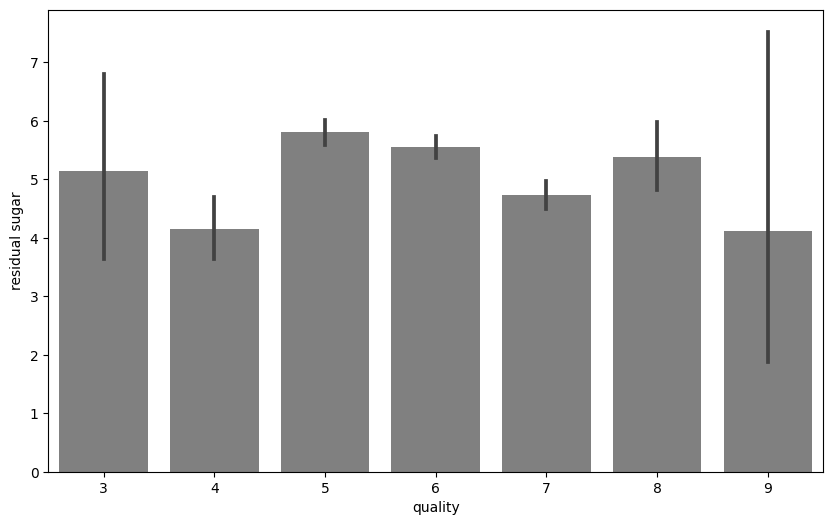

In [24]:
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'residual sugar',data=df, color='grey')

<Axes: xlabel='quality', ylabel='chlorides'>

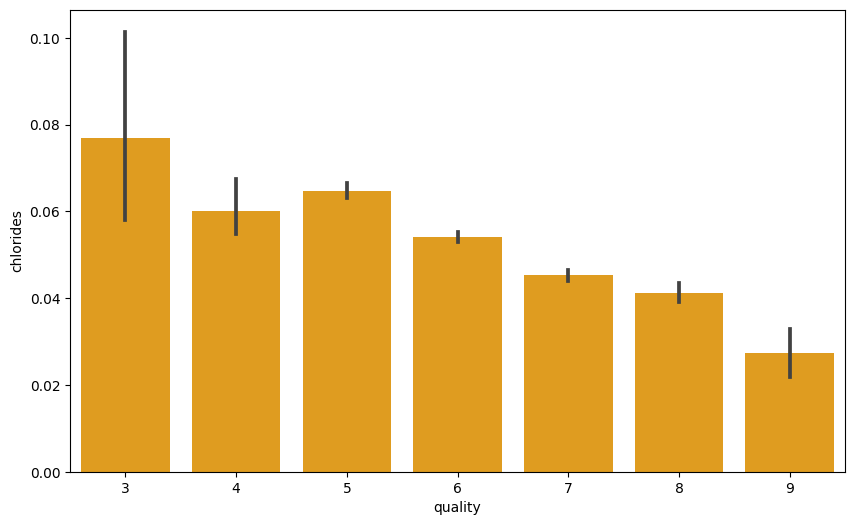

In [26]:
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'chlorides',data=df, color='orange')

<Axes: xlabel='quality', ylabel='density'>

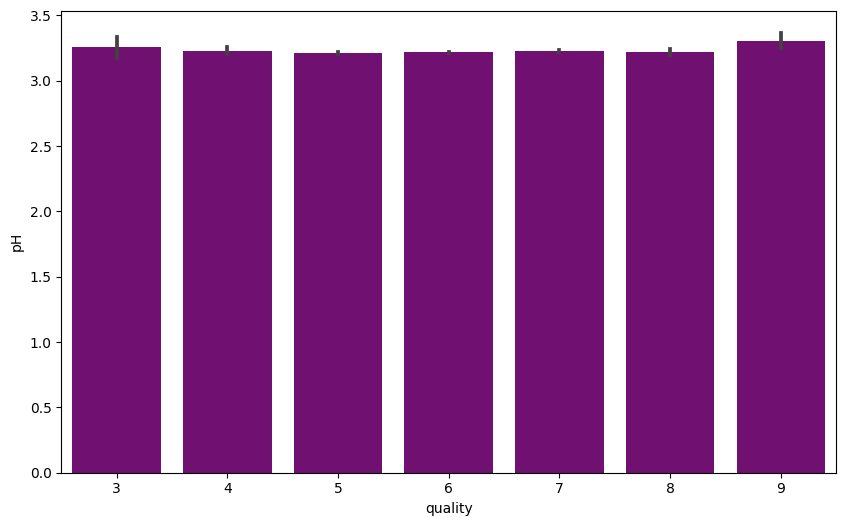

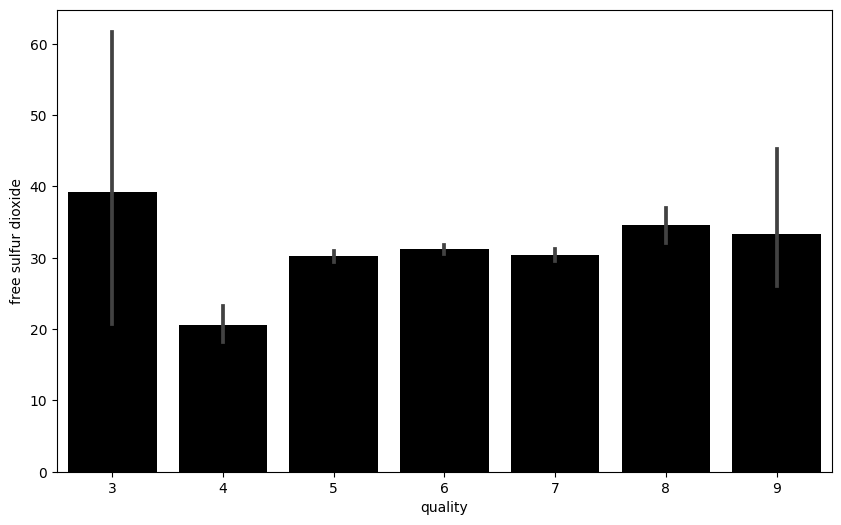

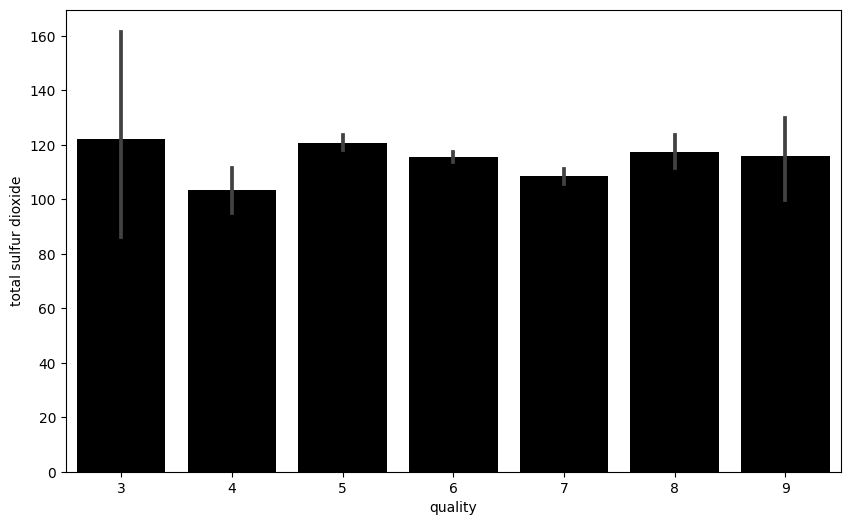

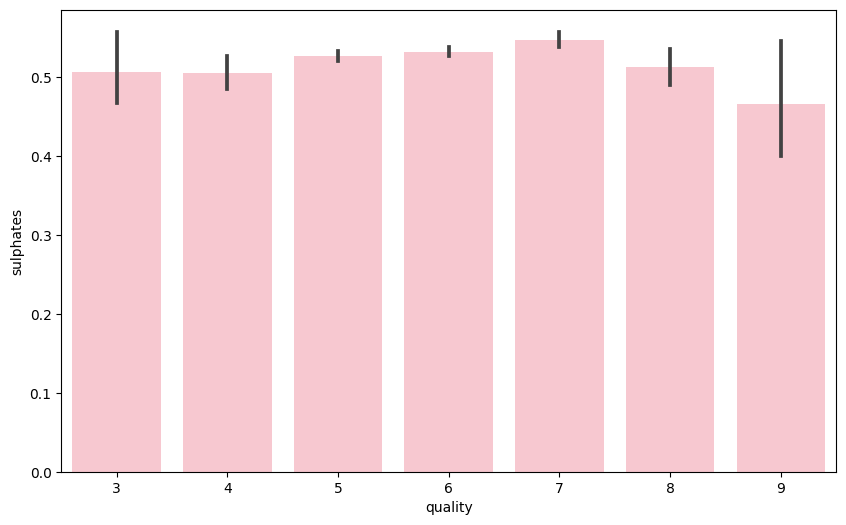

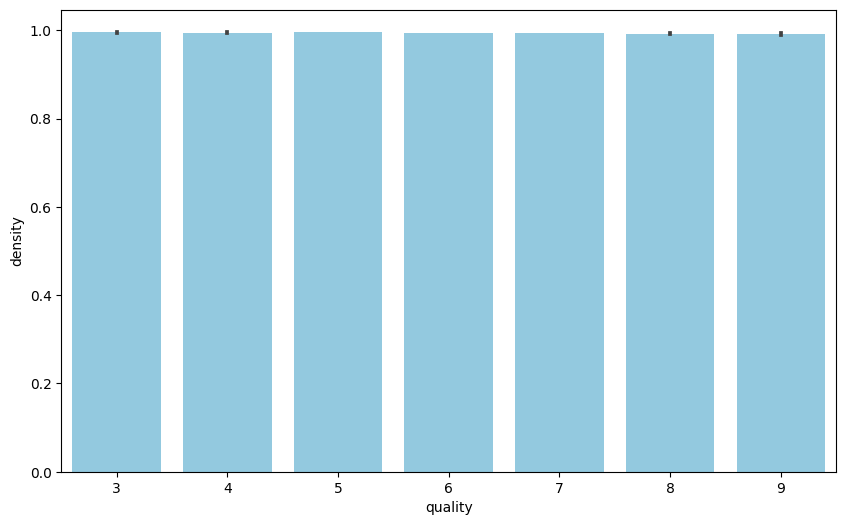

In [30]:
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'pH',data=df, color='purple')
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'free sulfur dioxide',data=df, color='black')
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'total sulfur dioxide',data=df, color='black')
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'sulphates',data=df, color='pink')
plt.figure(figsize=(10,6))
sb.barplot(x='quality', y= 'density',data=df, color='skyblue')

In [87]:
df.dtypes
one_hot_encoded_training_predictors = pd.get_dummies(df)
new_df=df.drop(columns=['type'])
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**CORRELATION:**
Correlation helps determine if there is a linear relationship between alcohol content (predictor) and wine quality (target).
A strong positive correlation indicates that higher alcohol content tends to be associated with higher wine quality ratings, which might make alcohol an important predictor in a model.

There are two types of Correlation:-
1) **Positive Correlation**: When one variable increases, the other variable also increases.
2) **Negative Correlation**: When one variable increases, the other variable decreases.

In [88]:
correlation=new_df.corr()


To understand the correlation we will construct heatmap


<Axes: >

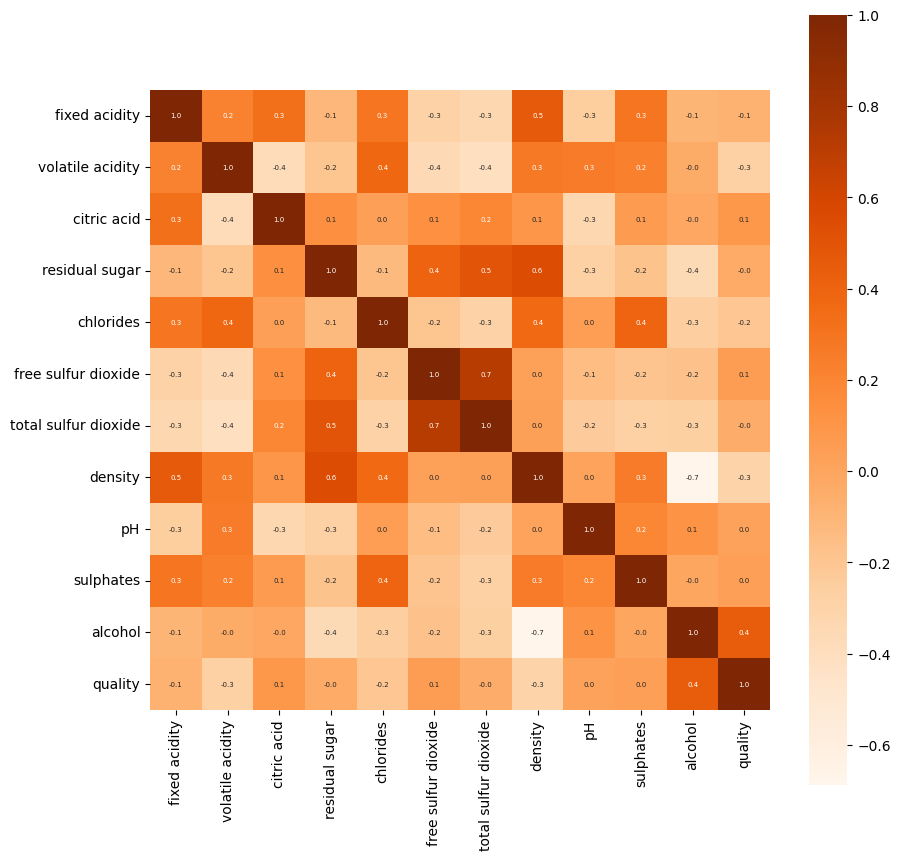

In [89]:
plt.figure(figsize=(10,10))
sb.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5},cmap='Oranges')

DATA PREPROCESSING


In [90]:
X=new_df.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**Label Binarization:**
As the quality is ranged from 0-10. I need **quality** to be either ***good*** or ***bad***.

So, we will put the condition .ie. if **quality** is **>=7** it is considered to be *good*, else it is considered *bad*

In [91]:
df['quality'].apply(lambda Y_value : 1 if Y_value>=7 else 0 )

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

Train & Test Split

In [92]:
Y=new_df['quality']
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size=0.2, random_state=2)
print(Y.shape, Y_train.shape,Y_test.shape)

(6463,) (5170,) (1293,)


MODEL TRAINING
**RANDOM FOREST CLASSIFIER**

In [93]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

**MODEL EVALUATION**

Here X test data are the predicted values of the ***quality*** and Y test data are the actual ***quality*** values


In [94]:
x_test_prediction=model.predict(X_test)
accuracy_of_testdata=accuracy_score(x_test_prediction,Y_test)
print(accuracy_of_testdata)

0.7006960556844548


So we get the accuracy of **0.70**. This means that model can predict 70 samples correctly out of 100.